# AA2 - TP1: Ej1


### Descripción:

En este problema, se presenta un conjunto de datos que contiene información sobre el rendimiento académico de estudiantes universitarios, así como diversos factores que podrían influir en él. El objetivo es construir un modelo de regresión utilizando redes neuronales para predecir el índice de rendimiento académico de los estudiantes basado en las características proporcionadas.

El dataset proporcionado incluye las siguientes variables para cada estudiante:
- Hours Studied: El número total de horas dedicadas al estudio por cada estudiante.
- Previous Scores: Las puntuaciones obtenidas por los estudiantes en exámenes previos.
- Extracurricular Activities: Si el estudiante participa en actividades extracurriculares (Sí o No).
- Sleep Hours: El número promedio de horas de sueño que el estudiante tuvo por día.
- Sample Question Papers Practiced: El número de cuestionarios de muestra que el estudiante practicó.
Además, el dataset incluye la variable objetivo:
- Performance Index: Un índice que representa el rendimiento académico general de cada estudiante, redondeado al entero más cercano. Este índice varía de 10 a 100, donde valores más altos indican un mejor rendimiento.

### 📚🔋 Carga de librerias y dataset

In [136]:
# Carga dataset
import gdown
import zipfile
import os

# Librerias básicas y EDA
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Visualizaciones
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import plotly.express as px
import seaborn as sns

# Escaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

# TensorFlow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Establecer GPU por defecto en caso de estar disponible.

In [137]:
# Configurar para que TensorFlow utilice la GPU por defecto
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Configurar para que TensorFlow asigne memoria dinámicamente
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        # Especificar la GPU por defecto
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Manejar error
        print(e)

1 Physical GPUs, 1 Logical GPUs


Carga del dataset

In [138]:
# ID del archivo en Drive
file_id = "1owZf7jaGCcaIWqfwBU9p4TUx6kuT8pXJ"  # <-- reemplazá por tu ID
output = "Student_Performance.csv"

# Descargar con gdown
gdown.download(f"https://drive.google.com/uc?id={file_id}", output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1owZf7jaGCcaIWqfwBU9p4TUx6kuT8pXJ
To: /content/Student_Performance.csv
100%|██████████| 175k/175k [00:00<00:00, 2.98MB/s]


'Student_Performance.csv'

In [139]:
#Carga del dataset
df = pd.read_csv("Student_Performance.csv")

### 🔎📊 Análisis exploratorio y visualizaciones

#### Descripción del dataset

In [140]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [142]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


No hay valores NaN en ninguna columna

In [143]:
df.isnull().sum()

,0
Hours Studied,0
Previous Scores,0
Extracurricular Activities,0
Sleep Hours,0
Sample Question Papers Practiced,0
Performance Index,0


#### Distribución de variables

La única variable categórica esta balanceada, ambas categorias tienen cantidad de muestras parecidas.

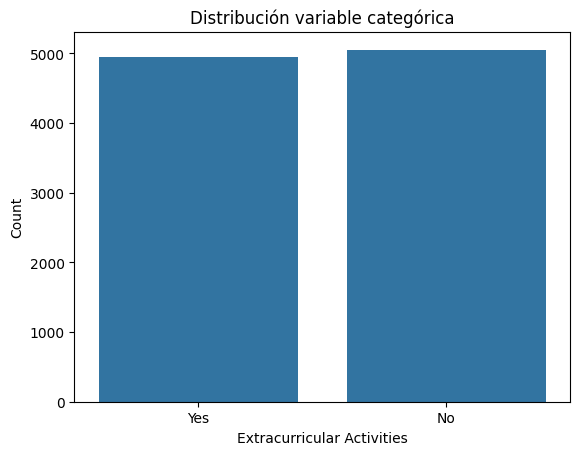

In [144]:
sns.countplot(x='Extracurricular Activities', data=df)
plt.title('Distribución variable categórica')
plt.xlabel('Extracurricular Activities')
plt.ylabel('Count')
plt.show()

No hay valores outliers en las variables numéricas. Tienen distintas escalas.

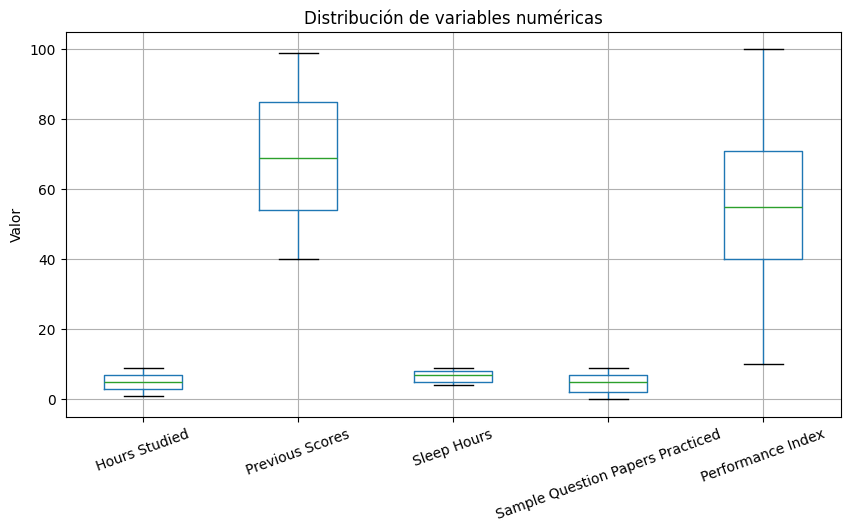

In [145]:
df.boxplot(figsize=(10,5), rot=20)
plt.title('Distribución de variables numéricas')
plt.ylabel('Valor')
plt.show()

Distribución de "Performance Index"

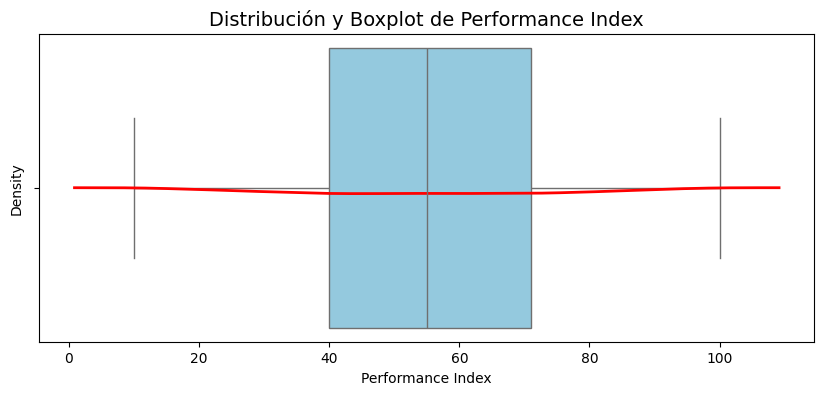

In [146]:
y = df["Performance Index"]

plt.figure(figsize=(10,4))

# Boxplot (horizontal, para que sea grande y ocupe el gráfico)
sns.boxplot(x=y, color="skyblue", fliersize=3)

# Curva de densidad (KDE) superpuesta
sns.kdeplot(x=y, color="red", linewidth=2)

plt.title("Distribución y Boxplot de Performance Index", fontsize=14)
plt.xlabel("Performance Index")
plt.show()

Matriz de correlación

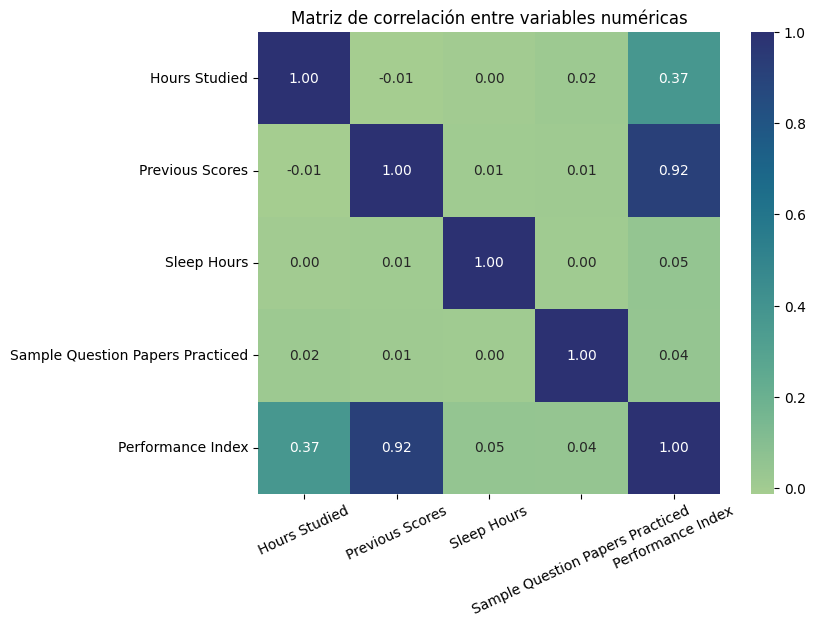

In [147]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

corr = df[num_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='crest', fmt=".2f", square=True, annot_kws={'rotation': 0})
plt.title("Matriz de correlación entre variables numéricas")
plt.xticks(rotation=25)
plt.show()

> Podemos observar una correlación lineal alta de 'Performance Index' y 'Previous Scores', y en menor medida con 'Hours Studied'.

Distribución de variables numéricas contra variable target Performance Index

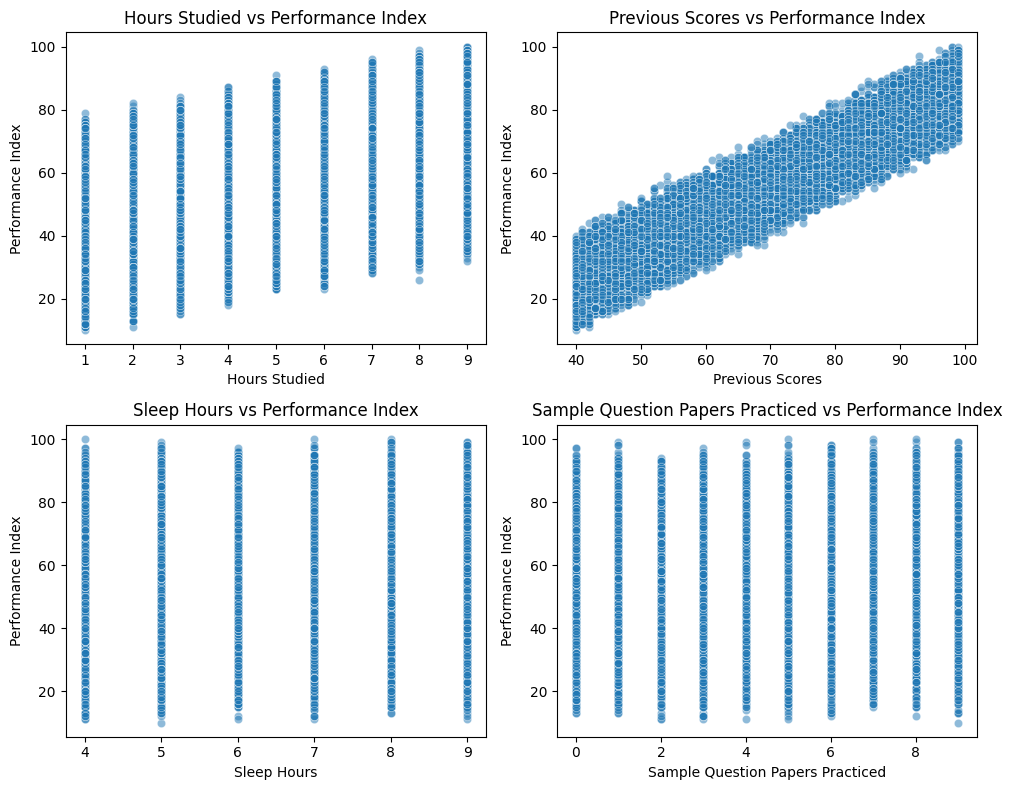

In [148]:
target = "Performance Index"
num_features = [col for col in num_cols if col != target]

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()

for i, col in enumerate(num_features):
    sns.scatterplot(x=df[col], y=df[target], ax=axes[i], alpha=0.5)
    axes[i].set_title(f"{col} vs {target}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel(target)

plt.tight_layout()
plt.show()



> Este gráfico confirma lo visto en la matriz de correlación, podemos ver una correlación lineal de las variables antes mencionadas.



### 📏✂️ Estandarización y división del dataset

#### División del dataset

Variable target

In [149]:
# Separar la variable target
df_target = df["Performance Index"]
df.drop(columns=["Performance Index"], inplace=True)

División del dataset

In [150]:
# X = variables de entrada, y = notas (target)
X_train, X_test, y_train, y_test = train_test_split(
    df, df_target, test_size=0.2, random_state=42
)

#### Estandarización e imputación

Variables numéricas

In [151]:
# Seleccionar solo variables numéricas
df_numeric = X_train.select_dtypes(include=['int64'])

# Manejar nulos en las numéricas, se completan con la mediana
df_numeric = df_numeric.fillna(df_numeric.median()) # En este caso no hay nulos en las variables numéricas

Variables categóricas

In [152]:
# Seleccionar las variables categóricas
categoricas = ["Extracurricular Activities"]
df_categorical = X_train[categoricas].copy()

# Manejar nulos en categóricas, se completan con la moda
for col in categoricas:
    moda = df_categorical[col].mode()[0]   # moda de la columna
    df_categorical[col] = df_categorical[col].fillna(moda)

# Utilizamos onehotencoder para las categóricas
encoder = OneHotEncoder(drop="first", sparse_output=False)
encoded = encoder.fit_transform(df_categorical)

encoded_df = pd.DataFrame(
    encoded,
    columns=encoder.get_feature_names_out(["Extracurricular Activities"]),
    index=df_categorical.index
)

Dataset final

In [153]:
# Concatenamos todo el dataset
df_concat = pd.concat([df_numeric, encoded_df], axis=1)

In [154]:
# Escalamos el dataset
scaler = StandardScaler().set_output(transform="pandas")
X_train_final = scaler.fit_transform(df_concat)

In [155]:
print("Shape final:", X_train_final.shape)
X_train_final.head()

Shape final: (8000, 5)


,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Extracurricular Activities_Yes
9254,0.006455,-1.183844,0.269888,0.134041,-0.989307
1561,-1.149747,-1.241506,0.269888,0.483562,1.010808
1670,-1.149747,0.661318,0.269888,-0.914520,-0.989307
6087,-1.149747,-1.356828,-0.318906,-1.264041,-0.989307
6669,1.162658,-1.299167,1.447477,-1.613561,-0.989307


Modificación de X_test


In [156]:
# Seleccionar numéricas en X_test
df_numeric_test = X_test.select_dtypes(include=['int64'])

# Imputar con las medianas de X_train
df_numeric_test = df_numeric_test.fillna(df_numeric.median())

# Seleccionar categórica en X_test
df_categorical_test = X_test[categoricas].copy()

# Imputar con las modas de X_train
for col in categoricas:
    moda = df_categorical[col].mode()[0]
    df_categorical_test[col] = df_categorical_test[col].fillna(moda)

# OneHotEncoder: solo transform (NO fit)
encoded_test = encoder.transform(df_categorical_test)

encoded_df_test = pd.DataFrame(
    encoded_test,
    columns=encoder.get_feature_names_out(["Extracurricular Activities"]),
    index=df_categorical_test.index
)

# Concatenar numéricas + categóricas
df_concat_test = pd.concat([df_numeric_test, encoded_df_test], axis=1)

# StandardScaler: solo transform (NO fit)
X_test_final = scaler.transform(df_concat_test)

### 🧠 Modelo de capas densas

Definir la arquitectura de la red

In [157]:
model_nn = tf.keras.Sequential([
    Input(shape=(5,)),
    Dense(units=32, activation='relu'),
    Dense(units=16, activation='relu'),
    Dense(units=1, activation='linear')
])

# Agregar más capas o más neuronas no producen mejores resultados de los obtenidos con un modelo simple como el aplicado.

In [158]:
# Callback que corta a las 5 epocas si no hubo cambios considerables en las metricas
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

Construir el modelo

In [159]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

model_nn.compile(
    optimizer=optimizer,
    loss='mse',
    metrics=['MAE']
)

Resumen del modelo

In [160]:
model_nn.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 32)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 737 (2.88 KB)

 Trainable params: 737 (2.88 KB)

 Non-trainable params: 0 (0.00 B)

Entrenar el modelo

In [161]:
history_model = model_nn.fit(
    X_train_final, y_train,
    epochs=50,
    batch_size=64,
    validation_split=0.2,
    verbose=1,
    callbacks=[early_stopping]
)

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - MAE: 33.3359 - loss: 1698.1602 - val_MAE: 4.3682 - val_loss: 29.6906
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - MAE: 4.0479 - loss: 25.8414 - val_MAE: 3.0382 - val_loss: 14.3415
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - MAE: 2.8963 - loss: 13.2825 - val_MAE: 2.5336 - val_loss: 9.9383
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - MAE: 2.4005 - loss: 9.2852 - val_MAE: 2.1966 - val_loss: 7.5587
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - MAE: 2.2082 - loss: 7.8515 - val_MAE: 2.0721 - val_loss: 6.6679
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - MAE: 2.0429 - loss: 6.5656 - val_MAE: 1.9409 - val_loss: 5.8796
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - MAE: 1.9081 - loss: 5.8362 - val_MAE: 1.8508 - val_loss: 5.3288
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - MAE: 1.8697 - loss: 5.5246 - val_MAE: 1.7606 - val_loss: 4.8667
Epoch 9/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/s

Visualizar resultados de entrenamiento

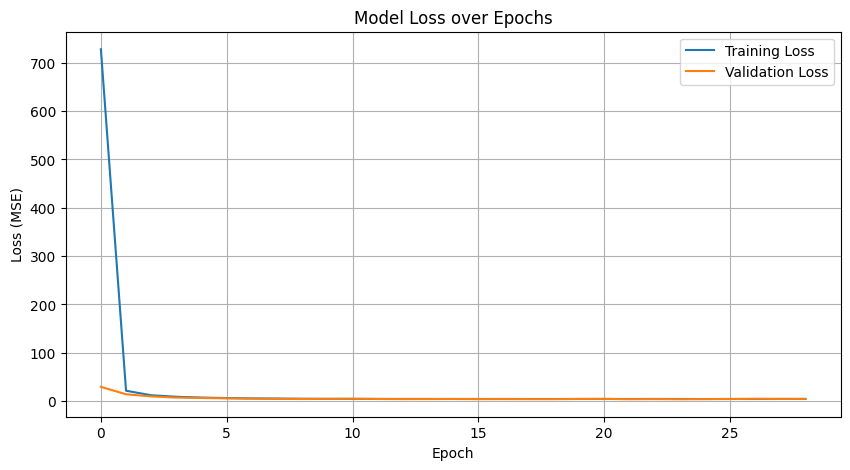

In [162]:
plt.figure(figsize=(10, 5))
plt.plot(history_model.history['loss'], label='Training Loss')
plt.plot(history_model.history['val_loss'], label='Validation Loss')
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()

Predecir nuevos valores de test

In [163]:
loss_nn, mae_nn = model_nn.evaluate(X_test_final, y_test, verbose=0)
rmse_nn = np.sqrt(loss_nn)
y_pred_nn = model_nn.predict(X_test_final)
r2_nn = r2_score(y_test, y_pred_nn)

print(f"R²: {r2_nn:.4f}")
print(f"Loss (MSE): {loss_nn:.4f}")
print(f"MAE: {mae_nn:.4f}")
print(f"RMSE: {rmse_nn:.4f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
R²: 0.9866
Loss (MSE): 4.9777
MAE: 1.7836
RMSE: 2.2311


### ↗️​ Regresión lineal

In [164]:
model_rl = LinearRegression()
model_rl.fit(X_train_final, y_train)

# Predicciones
y_pred = model_rl.predict(X_test_final)

# Métricas
mse_rl = mean_squared_error(y_test, y_pred)
mae_rl = mean_absolute_error(y_test, y_pred)
rmse_rl = np.sqrt(mse_rl)
r2_rl = r2_score(y_test, y_pred)

print(f"Coeficientes: {model_rl.coef_}\n")
print(f"R²: {r2_rl:.4f}")
print(f"Loss (MSE): {mse_rl:.4f}")
print(f"MAE: {mae_rl:.4f}")
print(f"RMSE: {rmse_rl:.4f}")

Coeficientes: [ 7.40134079 17.63727127  0.81003107  0.54884171  0.30429076]

R²: 0.9890
Loss (MSE): 4.0826
MAE: 1.6111
RMSE: 2.0206


### ✒️ Conclusiones

In [165]:
# @title
print("Resultados de predecir 'Performance Index':\n")
print("Con red nueronal densa:")
print(f" > R²: {r2_nn:.4f}")
print(f" > Loss (MSE): {loss_nn:.4f}")
print(f" > MAE: {mae_nn:.4f}")
print(f" > RMSE: {rmse_nn:.4f}")
print("\nCon regresión lineal:")
print(f" > R²: {r2_rl:.4f}")
print(f" > Loss (MSE): {mse_rl:.4f}")
print(f" > MAE: {mae_rl:.4f}")
print(f" > RMSE: {rmse_rl:.4f}")

Resultados de predecir 'Performance Index':

Con red nueronal densa:
 > R²: 0.9866
 > Loss (MSE): 4.9777
 > MAE: 1.7836
 > RMSE: 2.2311

Con regresión lineal:
 > R²: 0.9890
 > Loss (MSE): 4.0826
 > MAE: 1.6111
 > RMSE: 2.0206


> Ambos modelos lograron un desempeño muy alto al predecir el Performance Index. Sin embargo, la regresión lineal obtuvo métricas ligeramente mejores (R²=0.9890, RMSE=2.02) en comparación con la red neuronal (R²=0.9866, RMSE=2.23), lo que sugiere que la relación entre las variables es principalmente lineal y que un modelo más simple como la regresión lineal resulta suficiente y más eficiente para este problema.